In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline


In [2]:
train_data = pd.read_csv('train_u6lujuX_CVtuZ9i.csv')
train_data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [3]:
print(train_data.shape)

(614, 13)


In [4]:
train_data.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [5]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [6]:
def missing_values(df):
    num_null_values = df.isnull().sum()
    return num_null_values

In [7]:
missing_values(train_data)

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [8]:
## Dealing with null values | Categorical Values
train_data['Gender'] = train_data['Gender'].fillna(train_data['Gender'].mode()[0])
train_data['Married'] = train_data['Married'].fillna(train_data['Married'].mode()[0])
train_data['Self_Employed'] = train_data['Self_Employed'].fillna(train_data['Self_Employed'].mode()[0])
train_data.drop('Dependents',axis=1,inplace=True)
train_data['LoanAmount'] = train_data['LoanAmount'].fillna(train_data['LoanAmount'].mean())
train_data['Loan_Amount_Term'] = train_data['Loan_Amount_Term'].fillna(train_data['Loan_Amount_Term'].mean())
train_data['Credit_History'] = train_data['Credit_History'].fillna(train_data['Credit_History'].mean())

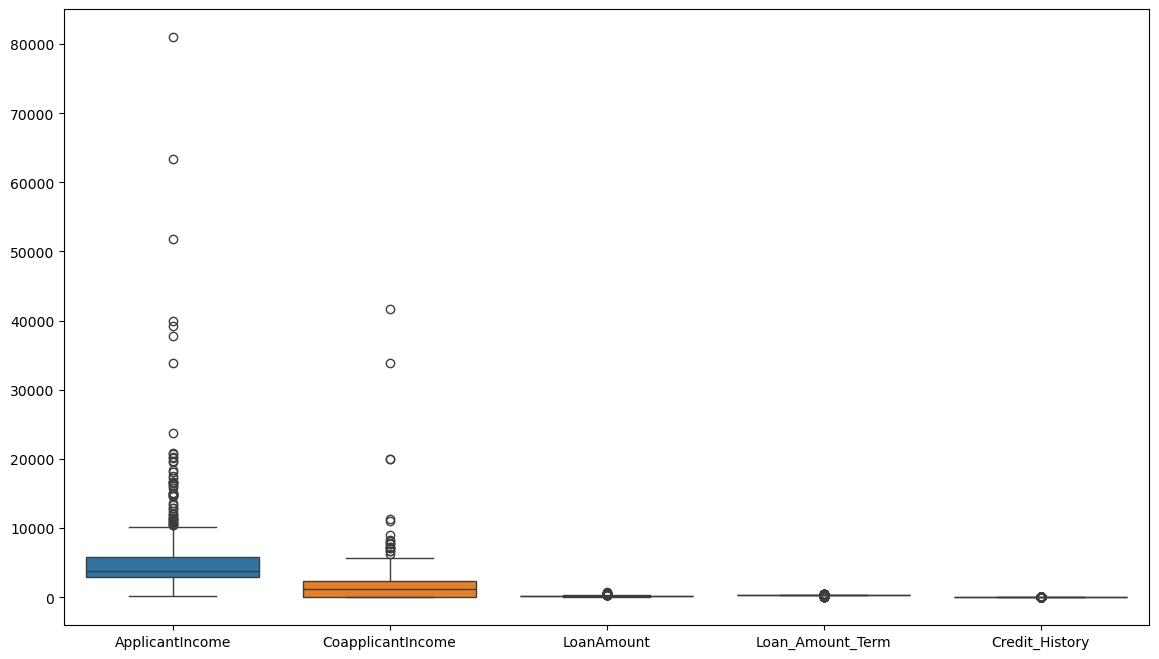

In [9]:
plt.figure(figsize=(14,8))
sns.boxplot(train_data)
plt.show()

In [10]:
## Visualization
def bar_chart(col):
    Approved = train_data[train_data['Loan_Status']=="Y"][col].value_counts()
    Disapproved = train_data[train_data['Loan_Status']=="N"][col].value_counts()

    df1 = pd.DataFrame([Approved,Disapproved])
    df1.index = ["Approved","Disapproved"]
    df1.plot(kind="bar")


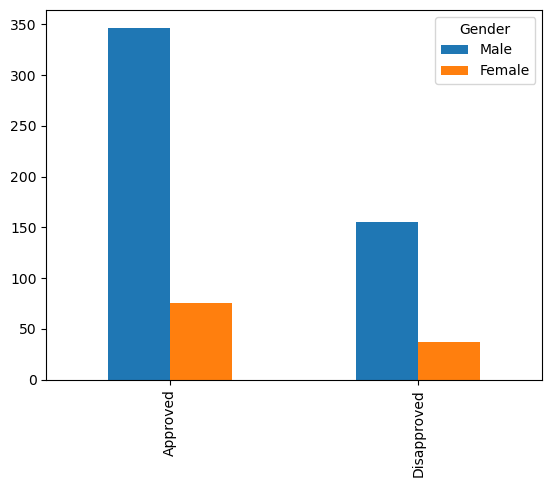

In [11]:
bar_chart("Gender")

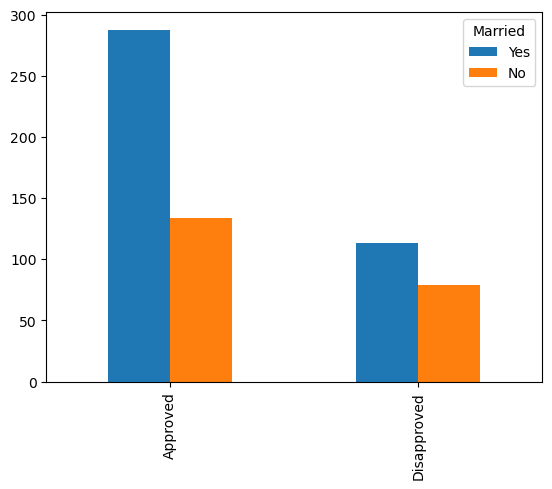

In [12]:
bar_chart("Married")

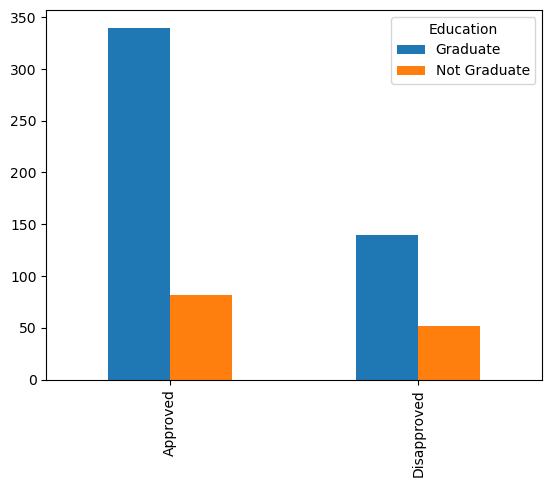

In [13]:
bar_chart("Education")

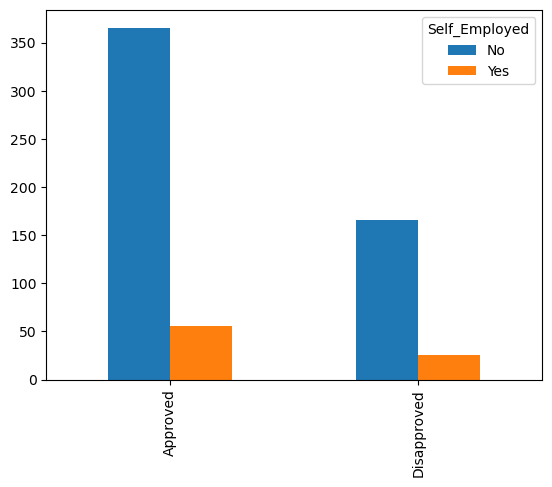

In [14]:
bar_chart("Self_Employed")

In [16]:
from sklearn.preprocessing import OrdinalEncoder
ord_enc = OrdinalEncoder()
train_data[['Gender','Married','Education','Self_Employed','Property_Area','Loan_Status']] = ord_enc.fit_transform(train_data[['Gender','Married','Education','Self_Employed','Property_Area','Loan_Status']])
train_data.head()

,Loan_ID,Gender,Married,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,1.0,0.0,0.0,0.0,5849,0.0,146.412162,360.0,1.0,2.0,1.0
1,LP001003,1.0,1.0,0.0,0.0,4583,1508.0,128.000000,360.0,1.0,0.0,0.0
2,LP001005,1.0,1.0,0.0,1.0,3000,0.0,66.000000,360.0,1.0,2.0,1.0
3,LP001006,1.0,1.0,1.0,0.0,2583,2358.0,120.000000,360.0,1.0,2.0,1.0
4,LP001008,1.0,0.0,0.0,0.0,6000,0.0,141.000000,360.0,1.0,2.0,1.0


In [19]:
train_data[['Gender','Married','Education','Self_Employed','Property_Area','Loan_Status']] = train_data[['Gender','Married','Education','Self_Employed','Property_Area','Loan_Status']].astype('int')

In [20]:
train_data

,Loan_ID,Gender,Married,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,1,0,0,0,5849,0.0,146.412162,360.0,1.0,2,1
1,LP001003,1,1,0,0,4583,1508.0,128.000000,360.0,1.0,0,0
2,LP001005,1,1,0,1,3000,0.0,66.000000,360.0,1.0,2,1
3,LP001006,1,1,1,0,2583,2358.0,120.000000,360.0,1.0,2,1
4,LP001008,1,0,0,0,6000,0.0,141.000000,360.0,1.0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,0,0,0,0,2900,0.0,71.000000,360.0,1.0,0,1
610,LP002979,1,1,0,0,4106,0.0,40.000000,180.0,1.0,0,1
611,LP002983,1,1,0,0,8072,240.0,253.000000,360.0,1.0,2,1
612,LP002984,1,1,0,0,7583,0.0,187.000000,360.0,1.0,2,1


In [23]:
# Model Development
from sklearn.model_selection import train_test_split
X = train_data.drop(['Loan_Status','Loan_ID'],axis=1)
y = train_data['Loan_Status']
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [27]:
from sklearn.naive_bayes import GaussianNB
gfc = GaussianNB()
gfc.fit(X_train,y_train)
pred1 = gfc.predict(X_test)
print(pred1)

[1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1
 1 1 1 1 1 1 1 1 1 1 0 0 0 1 1 0 1 1 1 1 1 0 1 0 1 0 1 1 1 1 1 1 1 0 1 1 1
 0 1 1 0 0 1 1 1 1 1 1 1 1 0 1 1 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 0 1 0 1 1 1
 0 1 1 1 1 1 1 1 1 1 1 0]


In [31]:
from sklearn.metrics import precision_score, recall_score, accuracy_score
def loss(y_true,y_pred):
    pre = precision_score(y_true, y_pred)
    rec = recall_score(y_true,y_pred)
    acc = accuracy_score(y_true,y_pred)

    print(f"Precision Score is {pre}")

    print(f"Recall Score is {rec}")

    print(f"Accuracy Score is {acc}")


In [32]:
loss(y_test,pred1)

Precision Score is 0.7647058823529411
Recall Score is 0.975
Accuracy Score is 0.7886178861788617


In [28]:
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression()
log_reg.fit(X_train,y_train)
pred2 = log_reg.predict(X_test)
print(pred2)

[1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1
 1 1 1 1 1 1 1 1 1 1 0 0 0 1 1 0 1 1 1 1 1 0 1 0 1 0 1 1 1 1 1 1 1 0 1 1 1
 0 1 1 0 0 1 1 1 1 1 1 1 1 0 1 1 1 0 0 1 1 1 1 1 1 1 1 1 1 1 1 0 1 0 1 1 1
 0 1 1 1 1 1 1 1 1 1 1 1]


/home/shubham-sharma/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [33]:
loss(y_test,pred2)

Precision Score is 0.7596153846153846
Recall Score is 0.9875
Accuracy Score is 0.7886178861788617


In [37]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

param_grid = {'C': [0.1,1,10,100,1000],
              'gamma':[1,0.1,0.01,0.001,0.0001],
              'kernel':['rbf']}
grid = GridSearchCV(SVC(),param_grid,refit=True, verbose=3)
grid.fit(X_train,y_train)

Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV 1/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.697 total time=   0.0s
[CV 2/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.694 total time=   0.0s
[CV 3/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.694 total time=   0.0s
[CV 4/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.694 total time=   0.0s
[CV 5/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.704 total time=   0.0s
[CV 1/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.697 total time=   0.0s
[CV 2/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.694 total time=   0.0s
[CV 3/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.694 total time=   0.0s
[CV 4/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.694 total time=   0.0s
[CV 5/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.704 total time=   0.0s
[CV 1/5] END .....C=0.1, gamma=0.01, kernel=rbf;, score=0.697 total time=   0.0s
[CV 2/5] END .....C=0.1, gamma=0.01, kernel=rbf

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['rbf']},
             verbose=3)

In [38]:
grid.best_params_

{'C': 10, 'gamma': 0.01, 'kernel': 'rbf'}

In [39]:
svc = SVC(C= 10, gamma= 0.01, kernel = 'rbf')
svc.fit(X_train,y_train)
pred3 = svc.predict(X_test)

In [40]:
loss(y_test,pred3)

Precision Score is 0.6611570247933884
Recall Score is 1.0
Accuracy Score is 0.6666666666666666


In [42]:
from xgboost import XGBClassifier
xgb = XGBClassifier(learning_rate = 0.1,n_estimators =1000, max_depth=3, min_child_weight=1,gamma=0,subsample=0.8,colsample_bytree=0.8, objective='binary:logistic',nthread=4,scale_pos_weight=1,seed = 27)
xgb.fit(X_train,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.8, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=0, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=3, max_leaves=None,
              min_child_weight=1, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=1000, n_jobs=None, nthread=4,
              num_parallel_tree=None, ...)

In [43]:
pred4 = xgb.predict(X_test)

In [44]:
loss(y_test,pred4)

Precision Score is 0.7608695652173914
Recall Score is 0.875
Accuracy Score is 0.7398373983739838


In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import accuracy_score

def randomized_search(params, X_train, y_train, X_test, y_test, runs=20, clf=DecisionTreeClassifier(random_state=42)):
    # Randomized search setup
    rnd_clf = RandomizedSearchCV(clf, param_distributions=params, n_iter=runs, cv=5, n_jobs=-1, random_state=2)
    
    # Train the model
    rnd_clf.fit(X_train, y_train)
    
    # Best model
    best_model = rnd_clf.best_estimator_

    # Training score (cross-validation mean)
    best_score = rnd_clf.best_score_
    print("Training score: {:.3f}".format(best_score))

    # Test score
    y_pred = best_model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    print("Test score: {:.3f}".format(accuracy))

    return best_model


In [62]:
randomized_search(
    params={
        'criterion': ['entropy', 'gini'],
        'splitter': ['random', 'best'],
        'min_samples_split': [2, 3, 4, 5, 6, 8, 10],
        'min_samples_leaf': [1, 0.01, 0.02, 0.03, 0.04],
        'min_impurity_decrease': [0.0, 0.005, 0.05, 0.10, 0.15, 0.2],
        'max_leaf_nodes': [10, 15, 20, 25, 30, 35, 40, 45, 50, None],
        'max_features': ['auto', 0.95, 0.90, 0.85, 0.80, 0.75, 0.70],
        'max_depth': [None, 2, 4, 6, 8],
        'min_weight_fraction_leaf': [0.0, 0.0025, 0.005, 0.0075, 0.01, 0.05]
    },
    X_train=X_train,
    y_train=y_train,
    X_test=X_test,
    y_test=y_test
)


Training score: 0.815
Test score: 0.789


/home/shubham-sharma/anaconda3/lib/python3.12/site-packages/sklearn/model_selection/_validation.py:528: FitFailedWarning: 
10 fits failed out of a total of 100.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
4 fits failed with the following error:
Traceback (most recent call last):
  File "/home/shubham-sharma/anaconda3/lib/python3.12/site-packages/sklearn/model_selection/_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/shubham-sharma/anaconda3/lib/python3.12/site-packages/sklearn/base.py", line 1382, in wrapper
    estimator._validate_params()
  File "/home/shubham-sharma/anaconda3/lib/python3.12/site-packages/sklearn/base.py", line 436, in _validate_params
    validate_parame

DecisionTreeClassifier(criterion='entropy', max_depth=2, max_features=0.95,
                       max_leaf_nodes=10, min_impurity_decrease=0.1,
                       min_samples_leaf=0.04, min_samples_split=6,
                       random_state=42)

In [63]:
ds = DecisionTreeClassifier(criterion='entropy', max_depth=2, max_features=0.95,
                       max_leaf_nodes=10, min_impurity_decrease=0.1,
                       min_samples_leaf=0.04, min_samples_split=6,
                       random_state=42)
ds.fit(X_train,y_train)
pred5 = ds.predict(X_test)

In [64]:
loss(y_test,pred5)

Precision Score is 0.7596153846153846
Recall Score is 0.9875
Accuracy Score is 0.7886178861788617


In [65]:
## Random Forest 
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=100, max_depth=2, random_state=42)
rf.fit(X_train,y_train)
pred6 = rf.predict(X_test)
loss(y_test,pred6)

Precision Score is 0.7596153846153846
Recall Score is 0.9875
Accuracy Score is 0.7886178861788617


In [66]:
import joblib
joblib.dump(rf, 'loan_prediction_model.pkl')
model = joblib.load('loan_prediction_model.pkl')
model.predict(X_test)

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])